In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=e077e236ae38f09b386e294882b3eec6b93cb7992d499413acea83f45faee46f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
## Logika Fuzzy
## Logika fuzzy adalah bentuk logika banyak nilai yang memungkinkan nilai kebenaran variabel mungkin berada di antara 0 dan 1.
## Ini berbeda dengan logika boolean klasik yang hanya menerima nilai benar atau salah (1 atau 0).
## Logika fuzzy digunakan dalam berbagai aplikasi seperti kontrol suhu, pengenalan pola, dan lain-lain.

## Komponen Utama dalam Sistem Fuzzy
## 1. **Fuzzification**: Mengubah input tegas menjadi variabel fuzzy.
## 2. **Inference**: Memproses variabel fuzzy sesuai aturan fuzzy.
## 3. **Defuzzification**: Mengubah hasil fuzzy menjadi output tegas.

In [4]:
import numpy as np ## Untuk Manipulasi Array
import skfuzzy as fuzz ## Untuk Fungsi Fuzzy
import matplotlib.pyplot as plt ## Untuk Memvisualisasi Hasil Akhir
from skfuzzy import control as ctrl ## Untuk Membuat Sistem Kontrol Fuzzy

# Input variables
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature') ## Variabel Input Suhu (0 - 40 C)
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity') ## Variabel Input Kelembaban (0 - 100%)

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed') ## Variabel Output Untuk Kecepatan Kipas (0 - 100%)

# Membership functions for temperature (Fungsi Keanggotaan Suhu Dingin, Hangat, Panas)
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 25, 40])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])

# Membership functions for humidity (Fungsi Keanggotaan Kelembaban Rendah, Sedang, Tinggi)
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# Membership functions for fan speed(Fungsi Keanggotaan Kecepatan Kipas Rendah, Sedang, Tinggi)
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

Temperature: 28, Humidity: 65, Fan Speed: 62.45
Temperature: 32, Humidity: 75, Fan Speed: 80.56
Temperature: 27, Humidity: 60, Fan Speed: 57.52
Temperature: 29, Humidity: 55, Fan Speed: 53.75
Temperature: 31, Humidity: 80, Fan Speed: 81.43
Temperature: 30, Humidity: 70, Fan Speed: 69.81
Temperature: 26, Humidity: 50, Fan Speed: 50.00
Temperature: 33, Humidity: 85, Fan Speed: 80.24
Temperature: 25, Humidity: 45, Fan Speed: 46.36
Temperature: 34, Humidity: 90, Fan Speed: 79.58
Temperature: 28, Humidity: 70, Fan Speed: 69.81
Temperature: 29, Humidity: 65, Fan Speed: 62.45
Temperature: 30, Humidity: 60, Fan Speed: 57.52
Temperature: 31, Humidity: 75, Fan Speed: 80.56
Temperature: 27, Humidity: 55, Fan Speed: 53.64


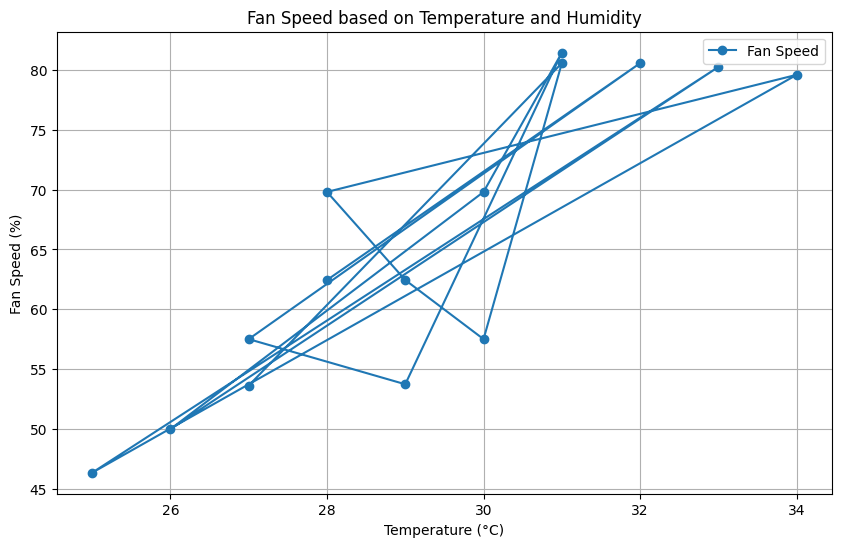

In [14]:
# Rules (Membuat aturan fuxxy yang menghubungkan variabel input dan output)
rule1 = ctrl.Rule(temperature['cold'] & humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['medium'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['high'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['warm'] & humidity['low'], fan_speed['low'])
rule5 = ctrl.Rule(temperature['warm'] & humidity['medium'], fan_speed['medium'])
rule6 = ctrl.Rule(temperature['warm'] & humidity['high'], fan_speed['high'])
rule7 = ctrl.Rule(temperature['hot'] & humidity['low'], fan_speed['medium'])
rule8 = ctrl.Rule(temperature['hot'] & humidity['medium'], fan_speed['high'])
rule9 = ctrl.Rule(temperature['hot'] & humidity['high'], fan_speed['high'])

# Function to simulate fan speed for multiple input values
def simulate_fan_speed(temperature_values, humidity_values):
    results = []
    for temp, hum in zip(temperature_values, humidity_values):
        fan_simulation.input['temperature'] = temp
        fan_simulation.input['humidity'] = hum
        fan_simulation.compute()
        results.append(fan_simulation.output['fan_speed'])
        print(f"Temperature: {temp}, Humidity: {hum}, Fan Speed: {fan_simulation.output['fan_speed']:.2f}")
    return results

# Example input values
temperature_values = [28, 32, 27, 29, 31, 30, 26, 33, 25, 34, 28, 29, 30, 31, 27]
humidity_values = [65, 75, 60, 55, 80, 70, 50, 85, 45, 90, 70, 65, 60, 75, 55]

# Run the simulation
fan_speeds = simulate_fan_speed(temperature_values, humidity_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(temperature_values, fan_speeds, 'o-', label='Fan Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fan Speed (%)')
plt.title('Fan Speed based on Temperature and Humidity')
plt.legend()
plt.grid(True)
plt.show()